***
# DETECTION OF ANOMALIES IN DISCRETE DATA
***

In [76]:
!pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 393.8 kB/s eta 0:00:39
   ---------------------------------------- 0.0/15.1 MB 393.8 kB/s eta 0:00:39
   ---------------------------------------- 0.0/15.1 MB 393.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/15.1 MB 607.9 kB/s eta 0:00:25
   ---------------------------------------- 0.2/15.1 MB 538.9 kB/s eta 0:00:28
   ---------------------------------------- 0.2/15.1 MB 538.9 kB/s eta 0:00:28
    --------------------------------------- 0.2/15.1 MB 600.7 kB/s eta 0:00:25
    --------------------------------------- 0.4/15.1 MB 849.3 kB/s eta 0:00:18
    --------------------------------------- 0.4/15.1 MB 849.3 kB/s eta 0:00:18
   - -------------------------------------- 0.5/15.1 MB 972.4 kB/s eta 0:00:16
   - -------------------------------------- 0.6/15.1 MB 1.1 MB/s eta 0

In [1]:
#!pip install yfinance

In [77]:
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

seed = 12

np.random.seed(seed)
tf.random.set_seed(seed)

In [33]:
main_data = yf.download("AAPL", start="2004-01-01", end="2024-01-14")

[*********************100%%**********************]  1 of 1 completed


In [34]:
main_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,0.384821,0.388393,0.378214,0.380000,0.322118,144642400
2004-01-05,0.382500,0.399821,0.382500,0.395893,0.335590,395018400
2004-01-06,0.397321,0.400357,0.387679,0.394464,0.334379,509348000
2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341948,586874400
2004-01-08,0.407857,0.423750,0.404464,0.417143,0.353604,460303200


In [35]:
main_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03
mean,43.145713,43.613578,42.695961,43.175400,41.624123,4.065784e+08
std,53.398555,53.989914,52.852256,53.451102,53.422588,3.967968e+08
min,0.382500,0.388393,0.378214,0.380000,0.322118,2.404830e+07
25%,5.866160,5.954018,5.765447,5.858839,4.966419,1.119353e+08
50%,21.528214,21.696250,21.344107,21.584465,18.460651,2.732810e+08
75%,48.301250,48.783751,48.004375,48.378125,46.434098,5.751032e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,3.372970e+09


In [78]:
sv.DataframeReport(main_data)

                                             |                                             | [  0%]   00:00 ->…

In [36]:
df = main_data.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,0.384821,0.388393,0.378214,0.380000,0.322118,144642400
2004-01-05,0.382500,0.399821,0.382500,0.395893,0.335590,395018400
2004-01-06,0.397321,0.400357,0.387679,0.394464,0.334379,509348000
2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341948,586874400
2004-01-08,0.407857,0.423750,0.404464,0.417143,0.353604,460303200


In [37]:
main_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03
mean,43.145713,43.613578,42.695961,43.175400,41.624123,4.065784e+08
std,53.398555,53.989914,52.852256,53.451102,53.422588,3.967968e+08
min,0.382500,0.388393,0.378214,0.380000,0.322118,2.404830e+07
25%,5.866160,5.954018,5.765447,5.858839,4.966419,1.119353e+08
50%,21.528214,21.696250,21.344107,21.584465,18.460651,2.732810e+08
75%,48.301250,48.783751,48.004375,48.378125,46.434098,5.751032e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,3.372970e+09


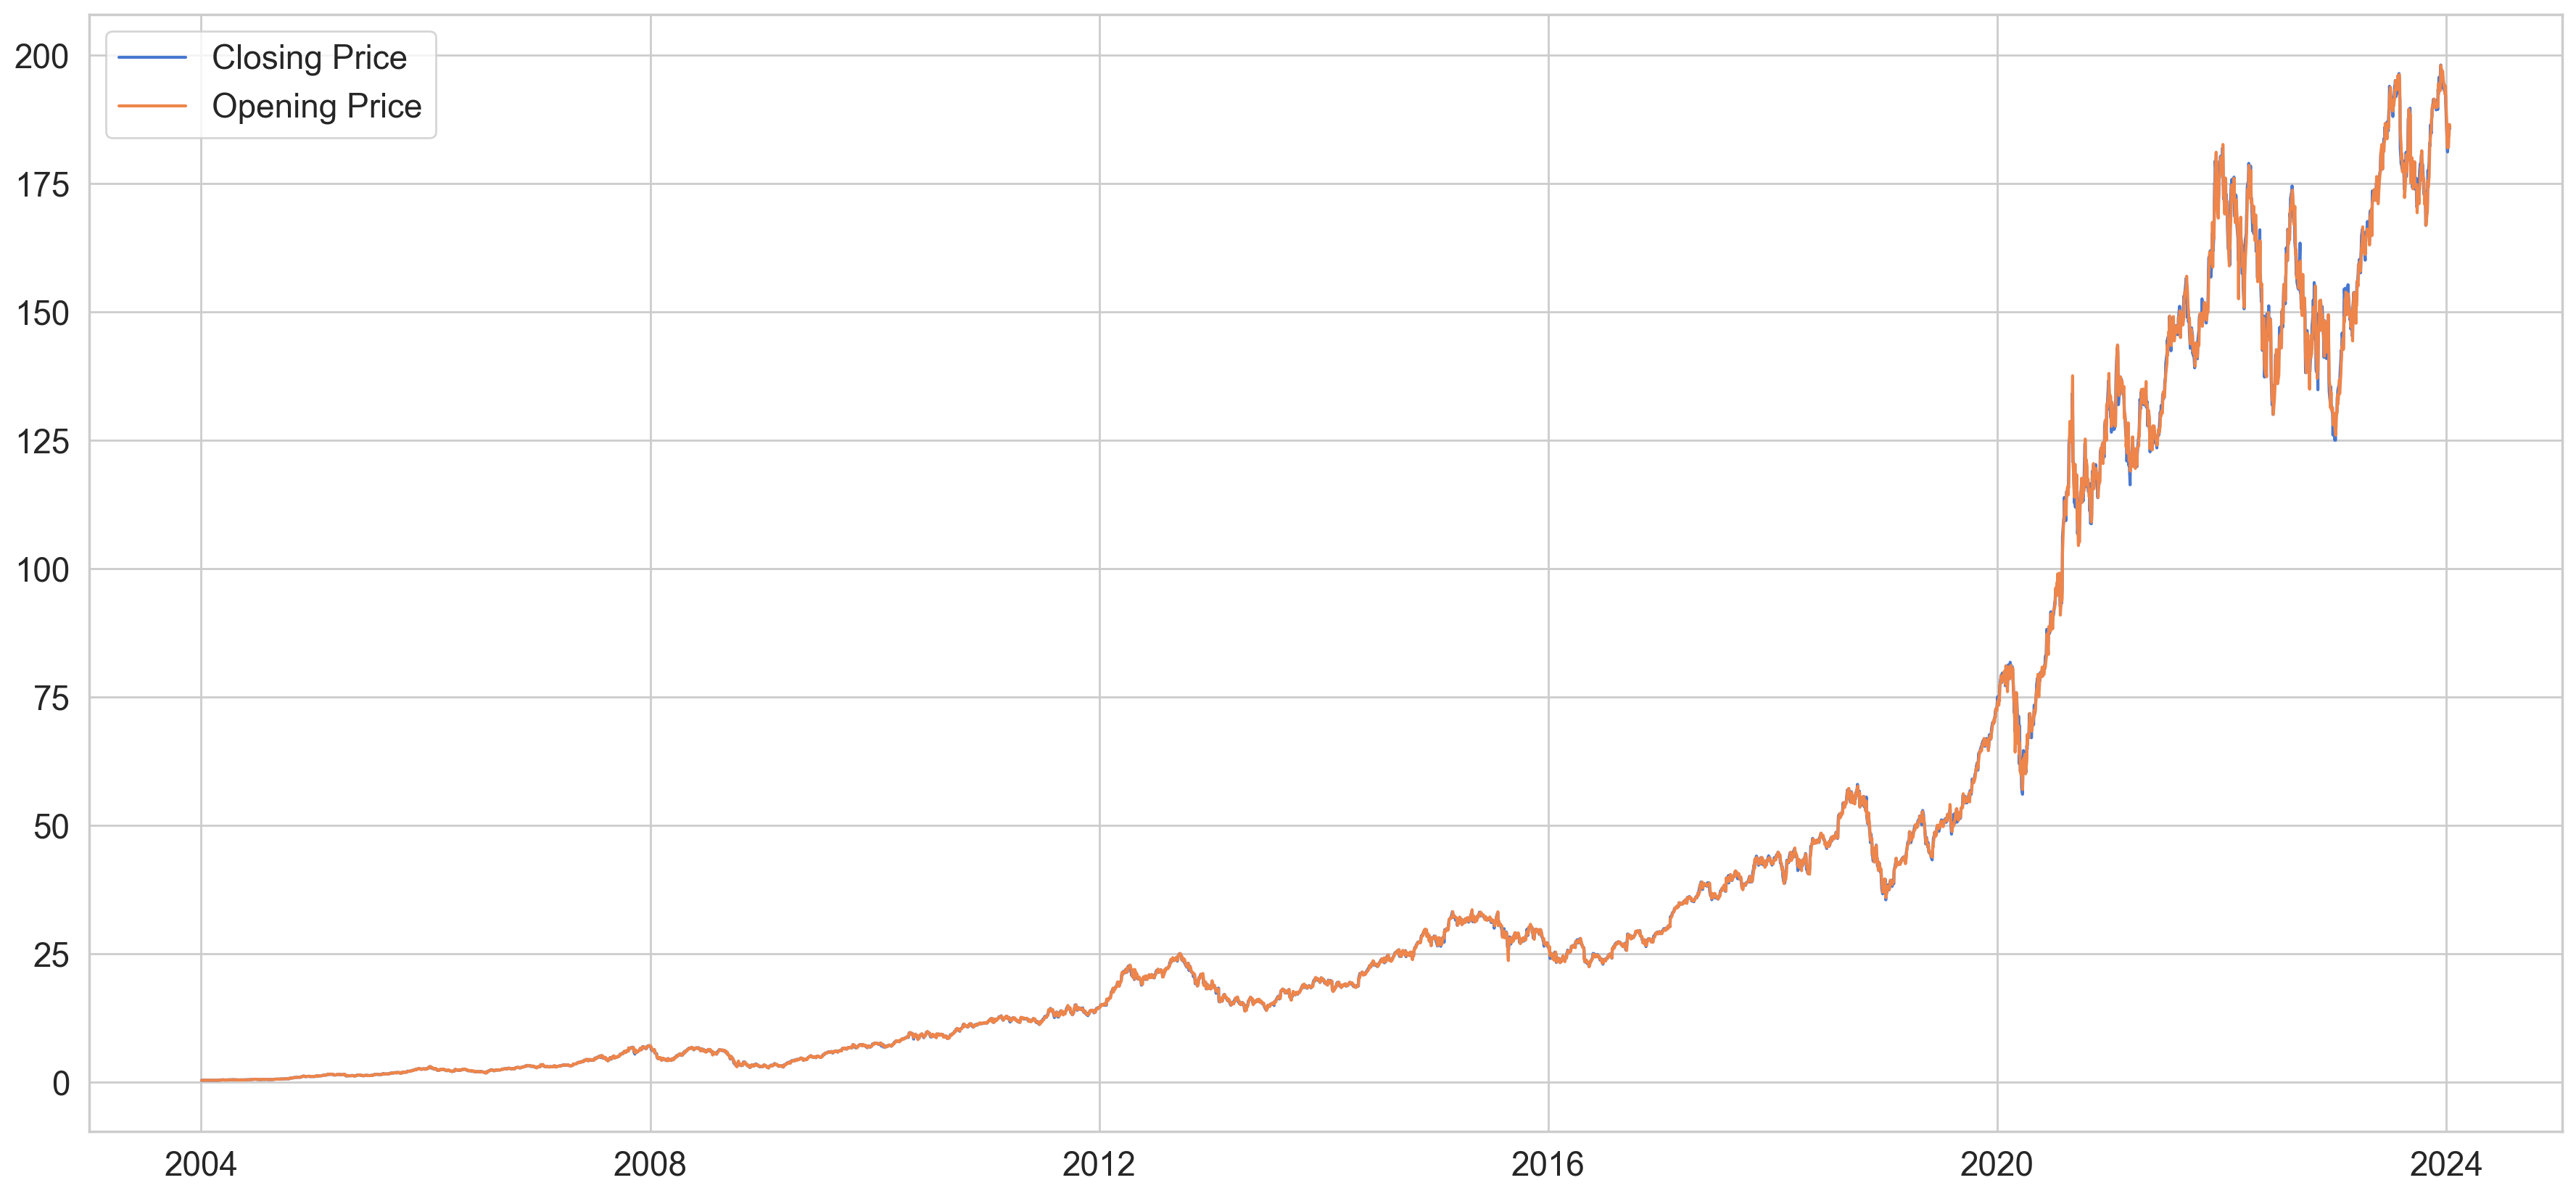

In [38]:
plt.plot(df["Close"], label='Closing Price')
plt.plot(df["Open"], label='Opening Price')
plt.legend();

In [39]:
train_size = int(len(df) * 0.95)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(4789, 6) (253, 6)


In [40]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

In [41]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [42]:
steps = 7

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[['Close']], train.Close, steps)
X_test, y_test = create_dataset(test[['Close']], test.Close, steps)

print(X_train.shape)

(4782, 7, 1)


In [43]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [44]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
135/135 [==============================] - 7s 16ms/step - loss: 0.1648 - val_loss: 0.4251
Epoch 2/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0909 - val_loss: 0.2561
Epoch 3/10
135/135 [==============================] - 1s 9ms/step - loss: 0.0753 - val_loss: 0.2448
Epoch 4/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0619 - val_loss: 0.1768
Epoch 5/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0704 - val_loss: 0.1776
Epoch 6/10
135/135 [==============================] - 1s 9ms/step - loss: 0.0694 - val_loss: 0.1750
Epoch 7/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0727 - val_loss: 0.1856
Epoch 8/10
135/135 [==============================] - 2s 16ms/step - loss: 0.0729 - val_loss: 0.1773
Epoch 9/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0823 - val_loss: 0.2007
Epoch 10/10
135/135 [==============================] - 2s 12ms/step - loss: 0.0804 - val_loss

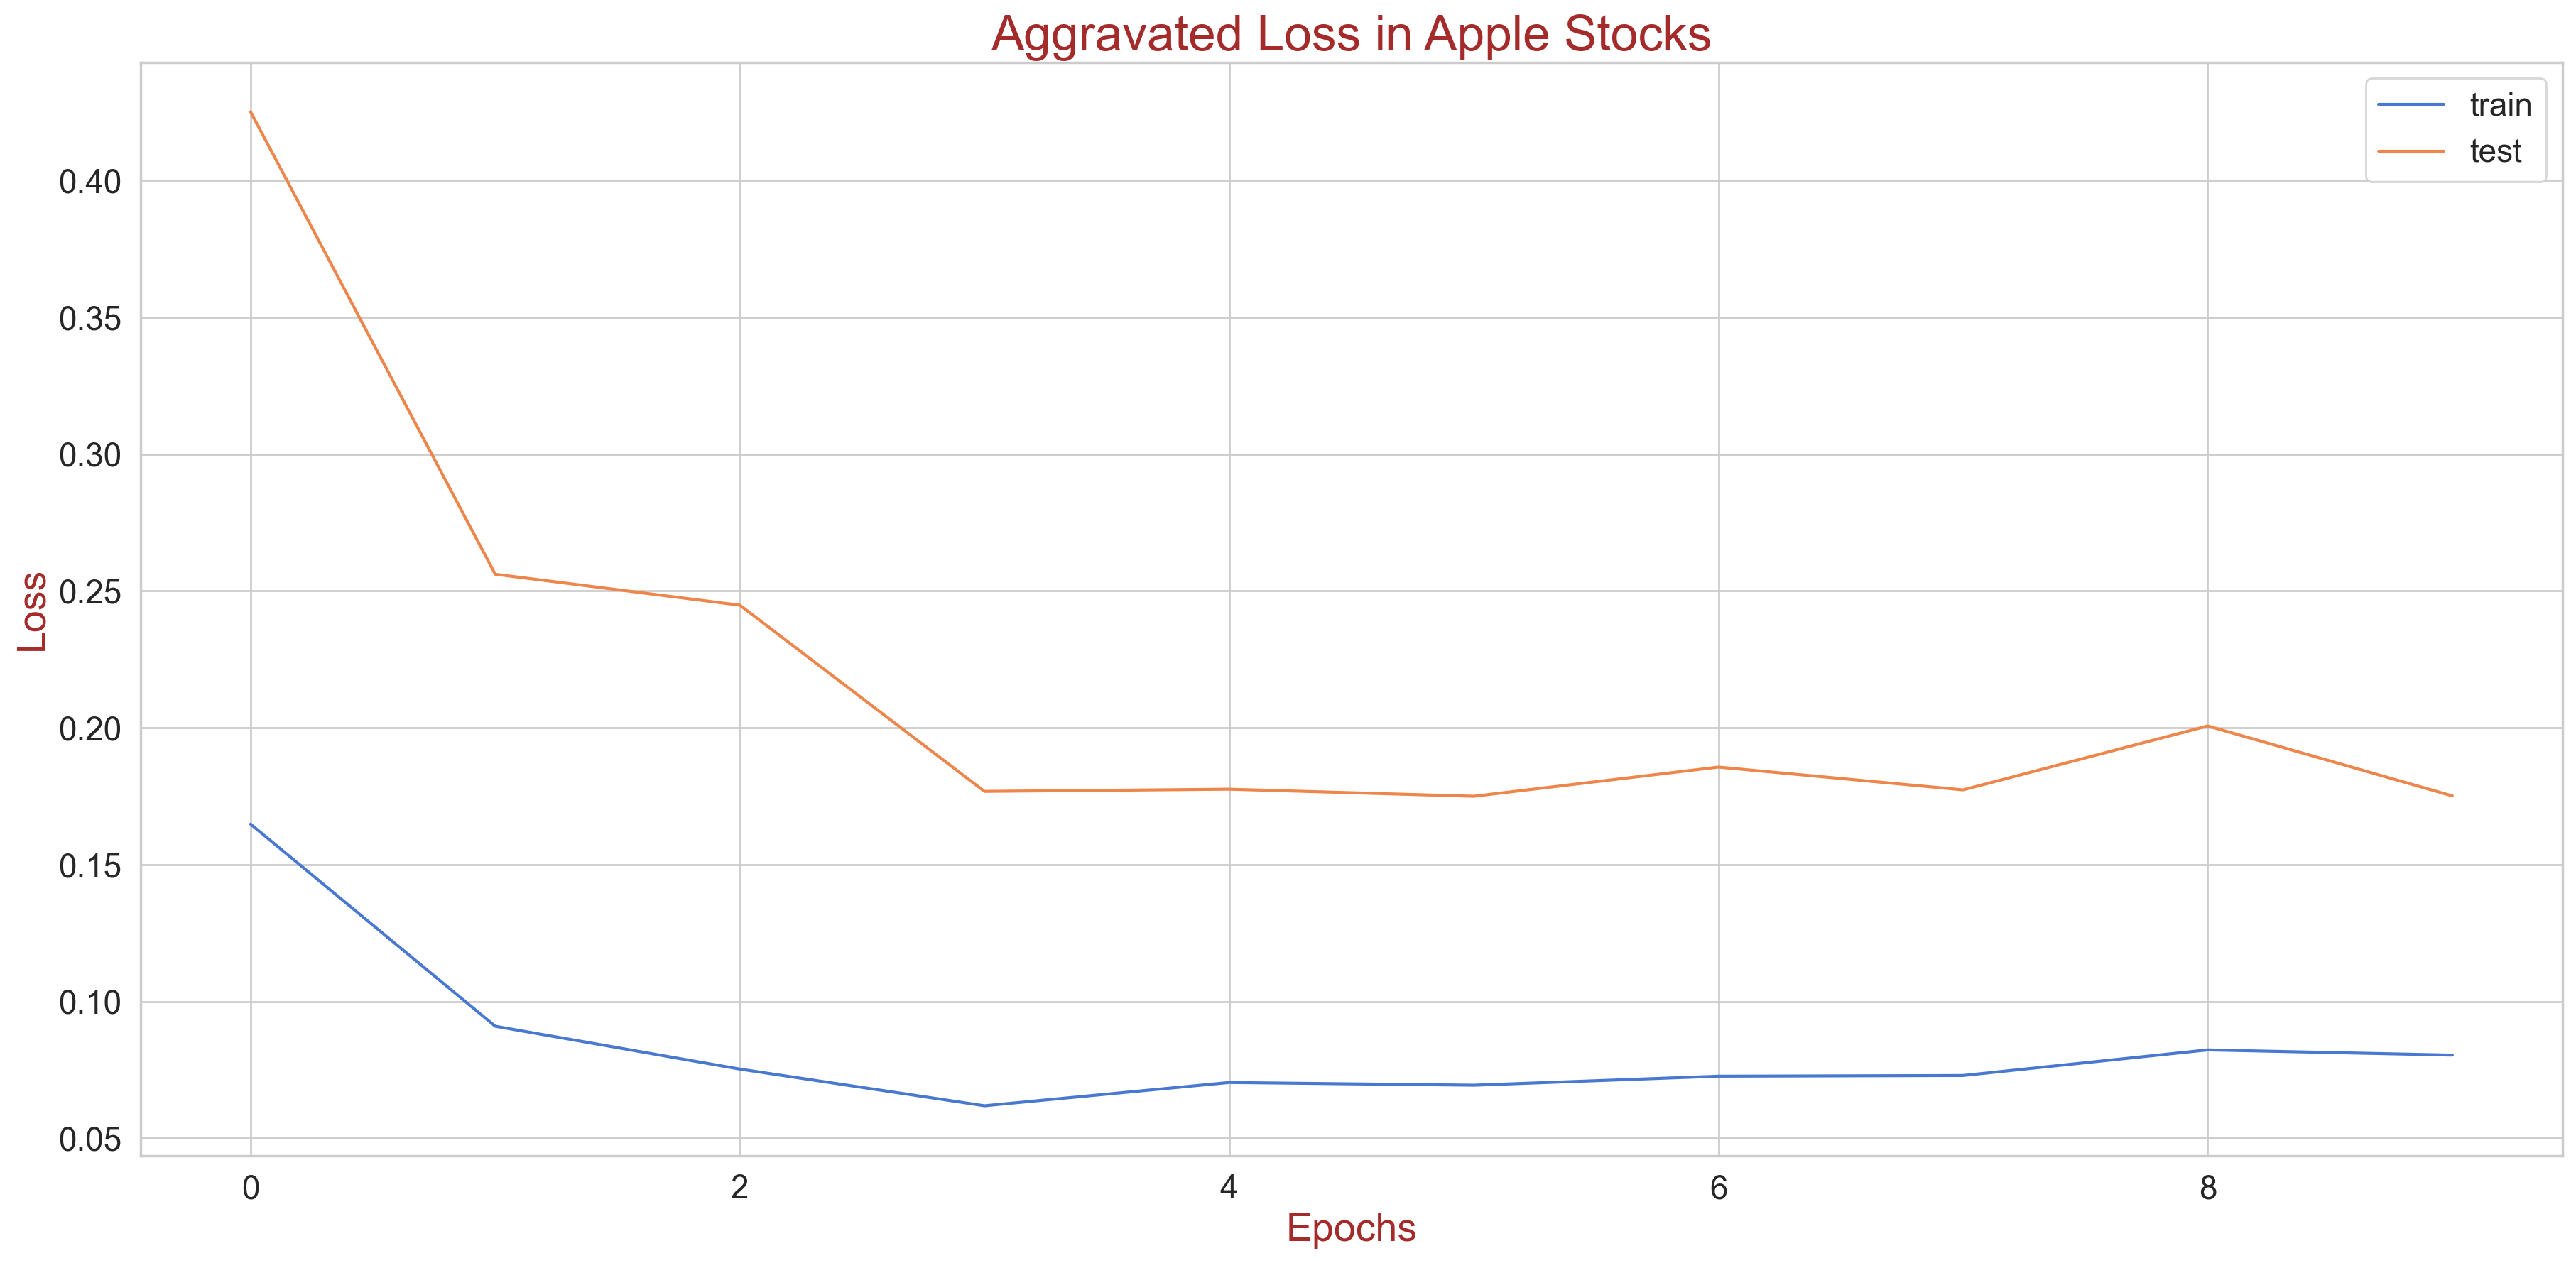

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel("Loss", color="brown", size=20)
plt.xlabel("Epochs", color="brown", size=20)
plt.title("Aggravated Loss in Apple Stocks", color="brown", size=25)
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [46]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

150/150 [==============================] - 1s 4ms/step


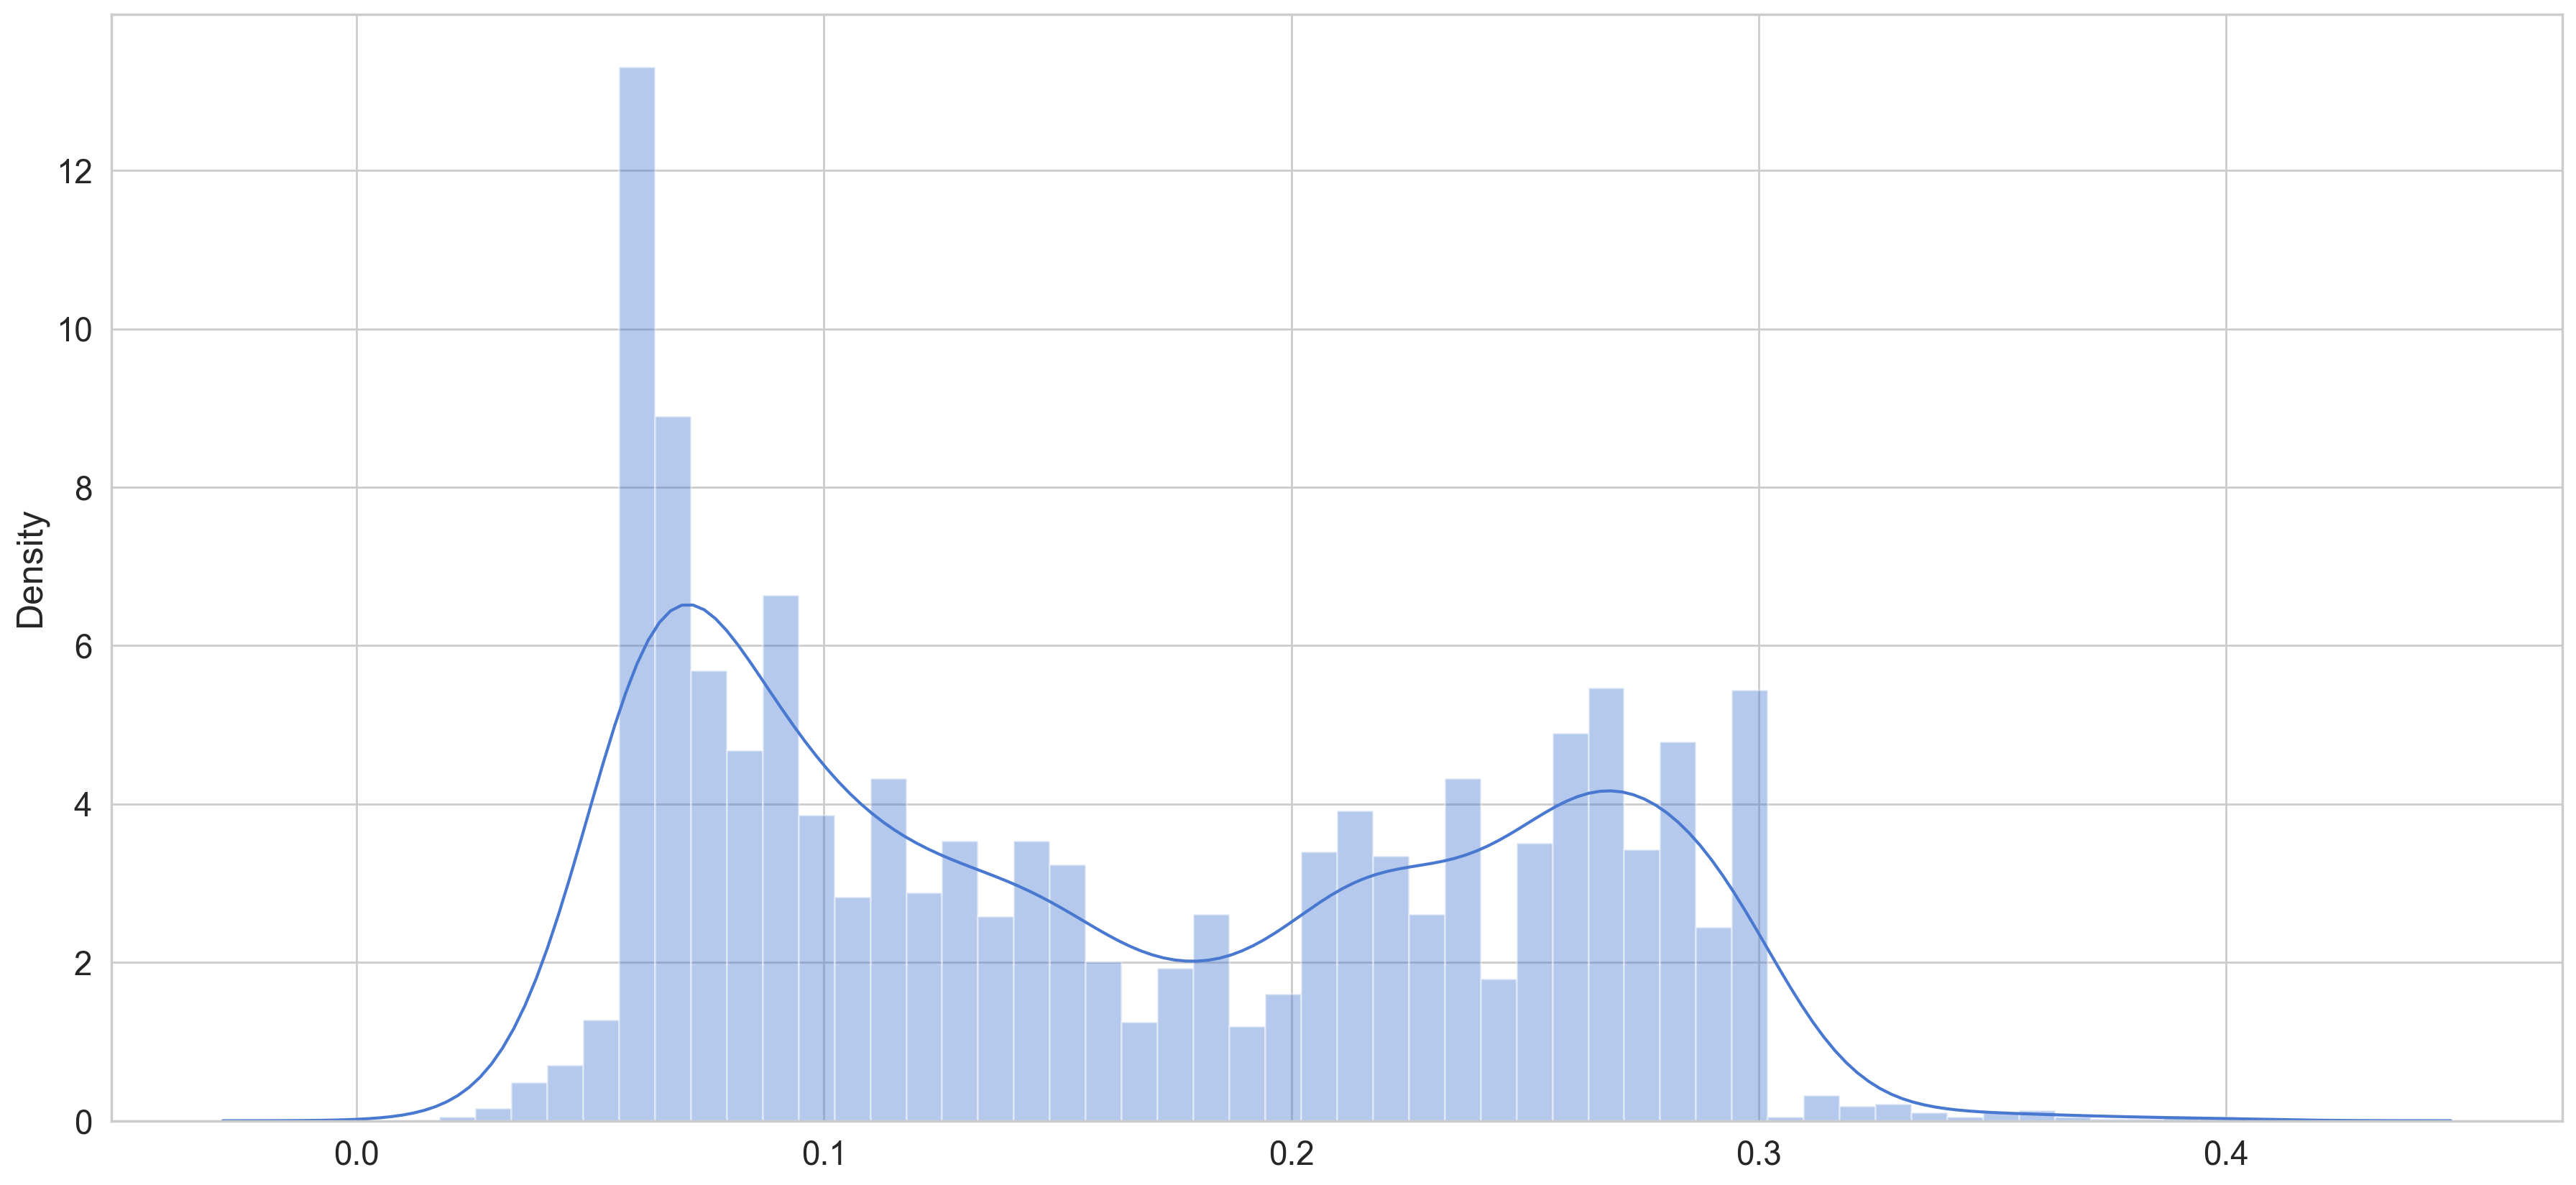

In [47]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [48]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

8/8 [==============================] - 0s 7ms/step


In [71]:
tresh = 0.63

result_df = pd.DataFrame(index=test[steps:].index)
result_df['loss'] = test_mae_loss
result_df['threshold'] = tresh
result_df['anomaly'] = result_df.loss > result_df.threshold
result_df['close'] = test[steps:].Close

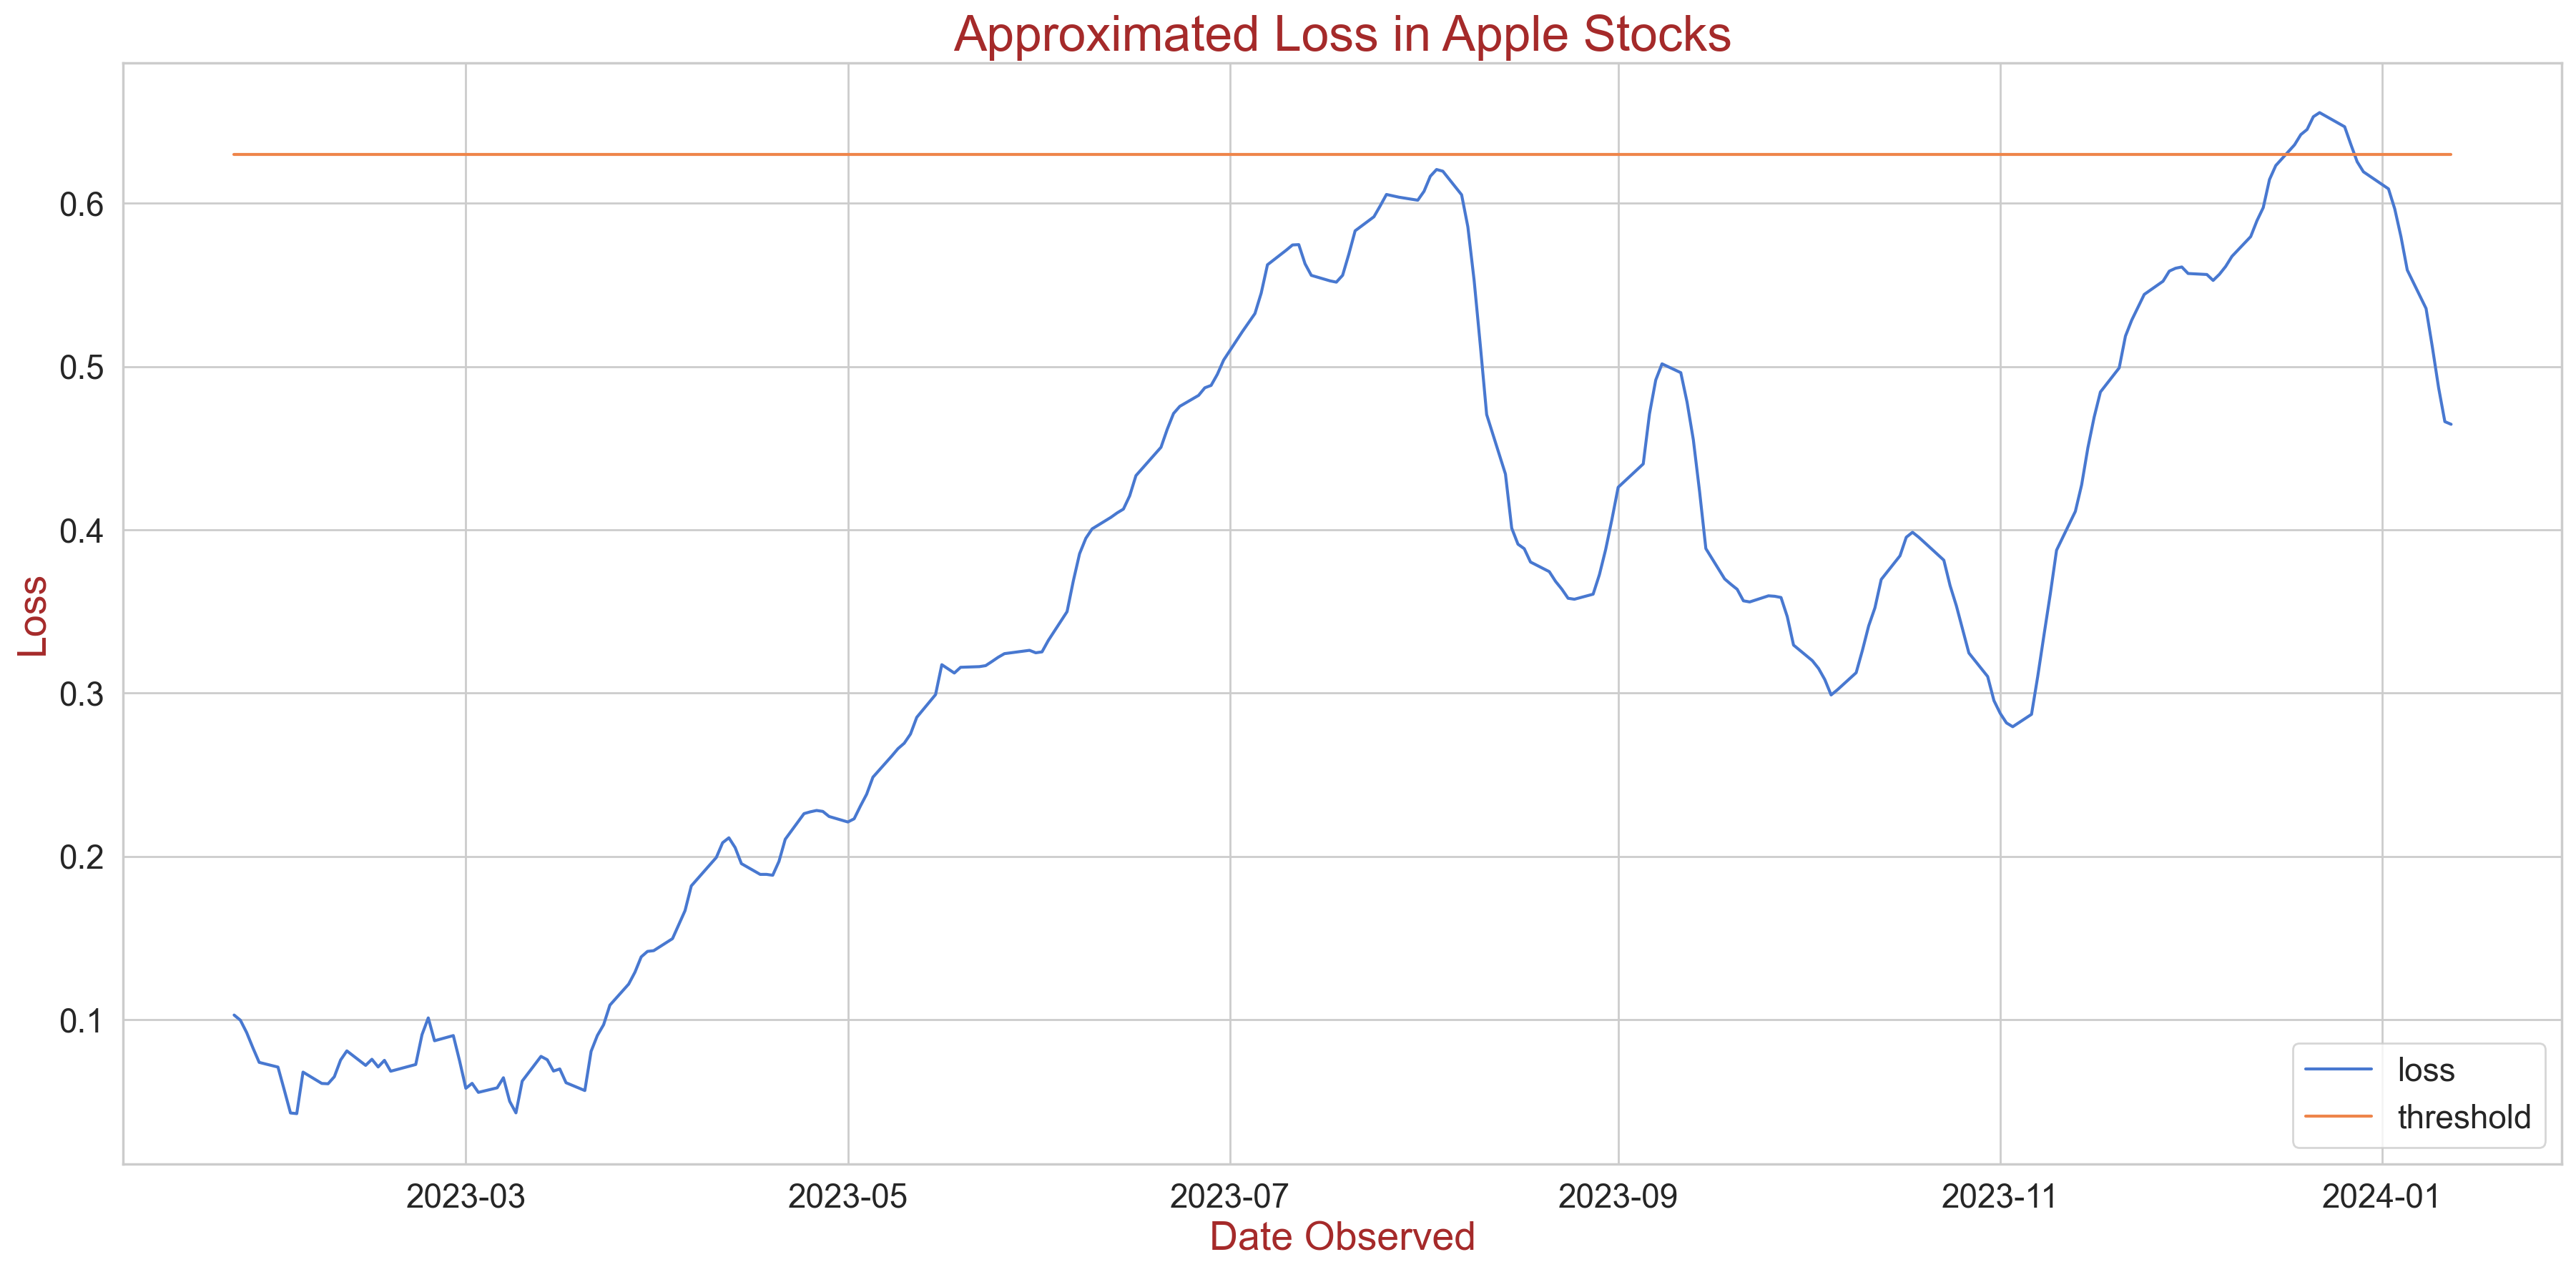

In [72]:
plt.plot(result_df.index, result_df.loss, label='loss')
plt.plot(result_df.index, result_df.threshold, label='threshold')
plt.xticks(rotation=0)
plt.ylabel("Loss", color="brown", size=20)
plt.xlabel("Date Observed", color="brown", size=20)
plt.title("Approximated Loss in Apple Stocks", color="brown", size=25)
plt.xticks(rotation=0)
plt.legend()
plt.show();

In [73]:
result_df.tail(20)

,loss,threshold,anomaly,close
Date,,,,
2023-12-14,0.614481,0.63,False,3.581981
2023-12-15,0.623036,0.63,False,3.570030
2023-12-18,0.635738,0.63,True,3.532848
2023-12-19,0.641991,0.63,True,3.556086
2023-12-20,0.645119,0.63,True,3.509388
2023-12-21,0.652945,0.63,True,3.506068
2023-12-22,0.655464,0.63,True,3.482166
2023-12-26,0.646807,0.63,True,3.469994
2023-12-27,0.635886,0.63,True,3.472207


In [74]:
anomalies = result_df[result_df.anomaly == True]
anomalies.head(30)

,loss,threshold,anomaly,close
Date,,,,
2023-12-18,0.635738,0.63,True,3.532848
2023-12-19,0.641991,0.63,True,3.556086
2023-12-20,0.645119,0.63,True,3.509388
2023-12-21,0.652945,0.63,True,3.506068
2023-12-22,0.655464,0.63,True,3.482166
2023-12-26,0.646807,0.63,True,3.469994
2023-12-27,0.635886,0.63,True,3.472207


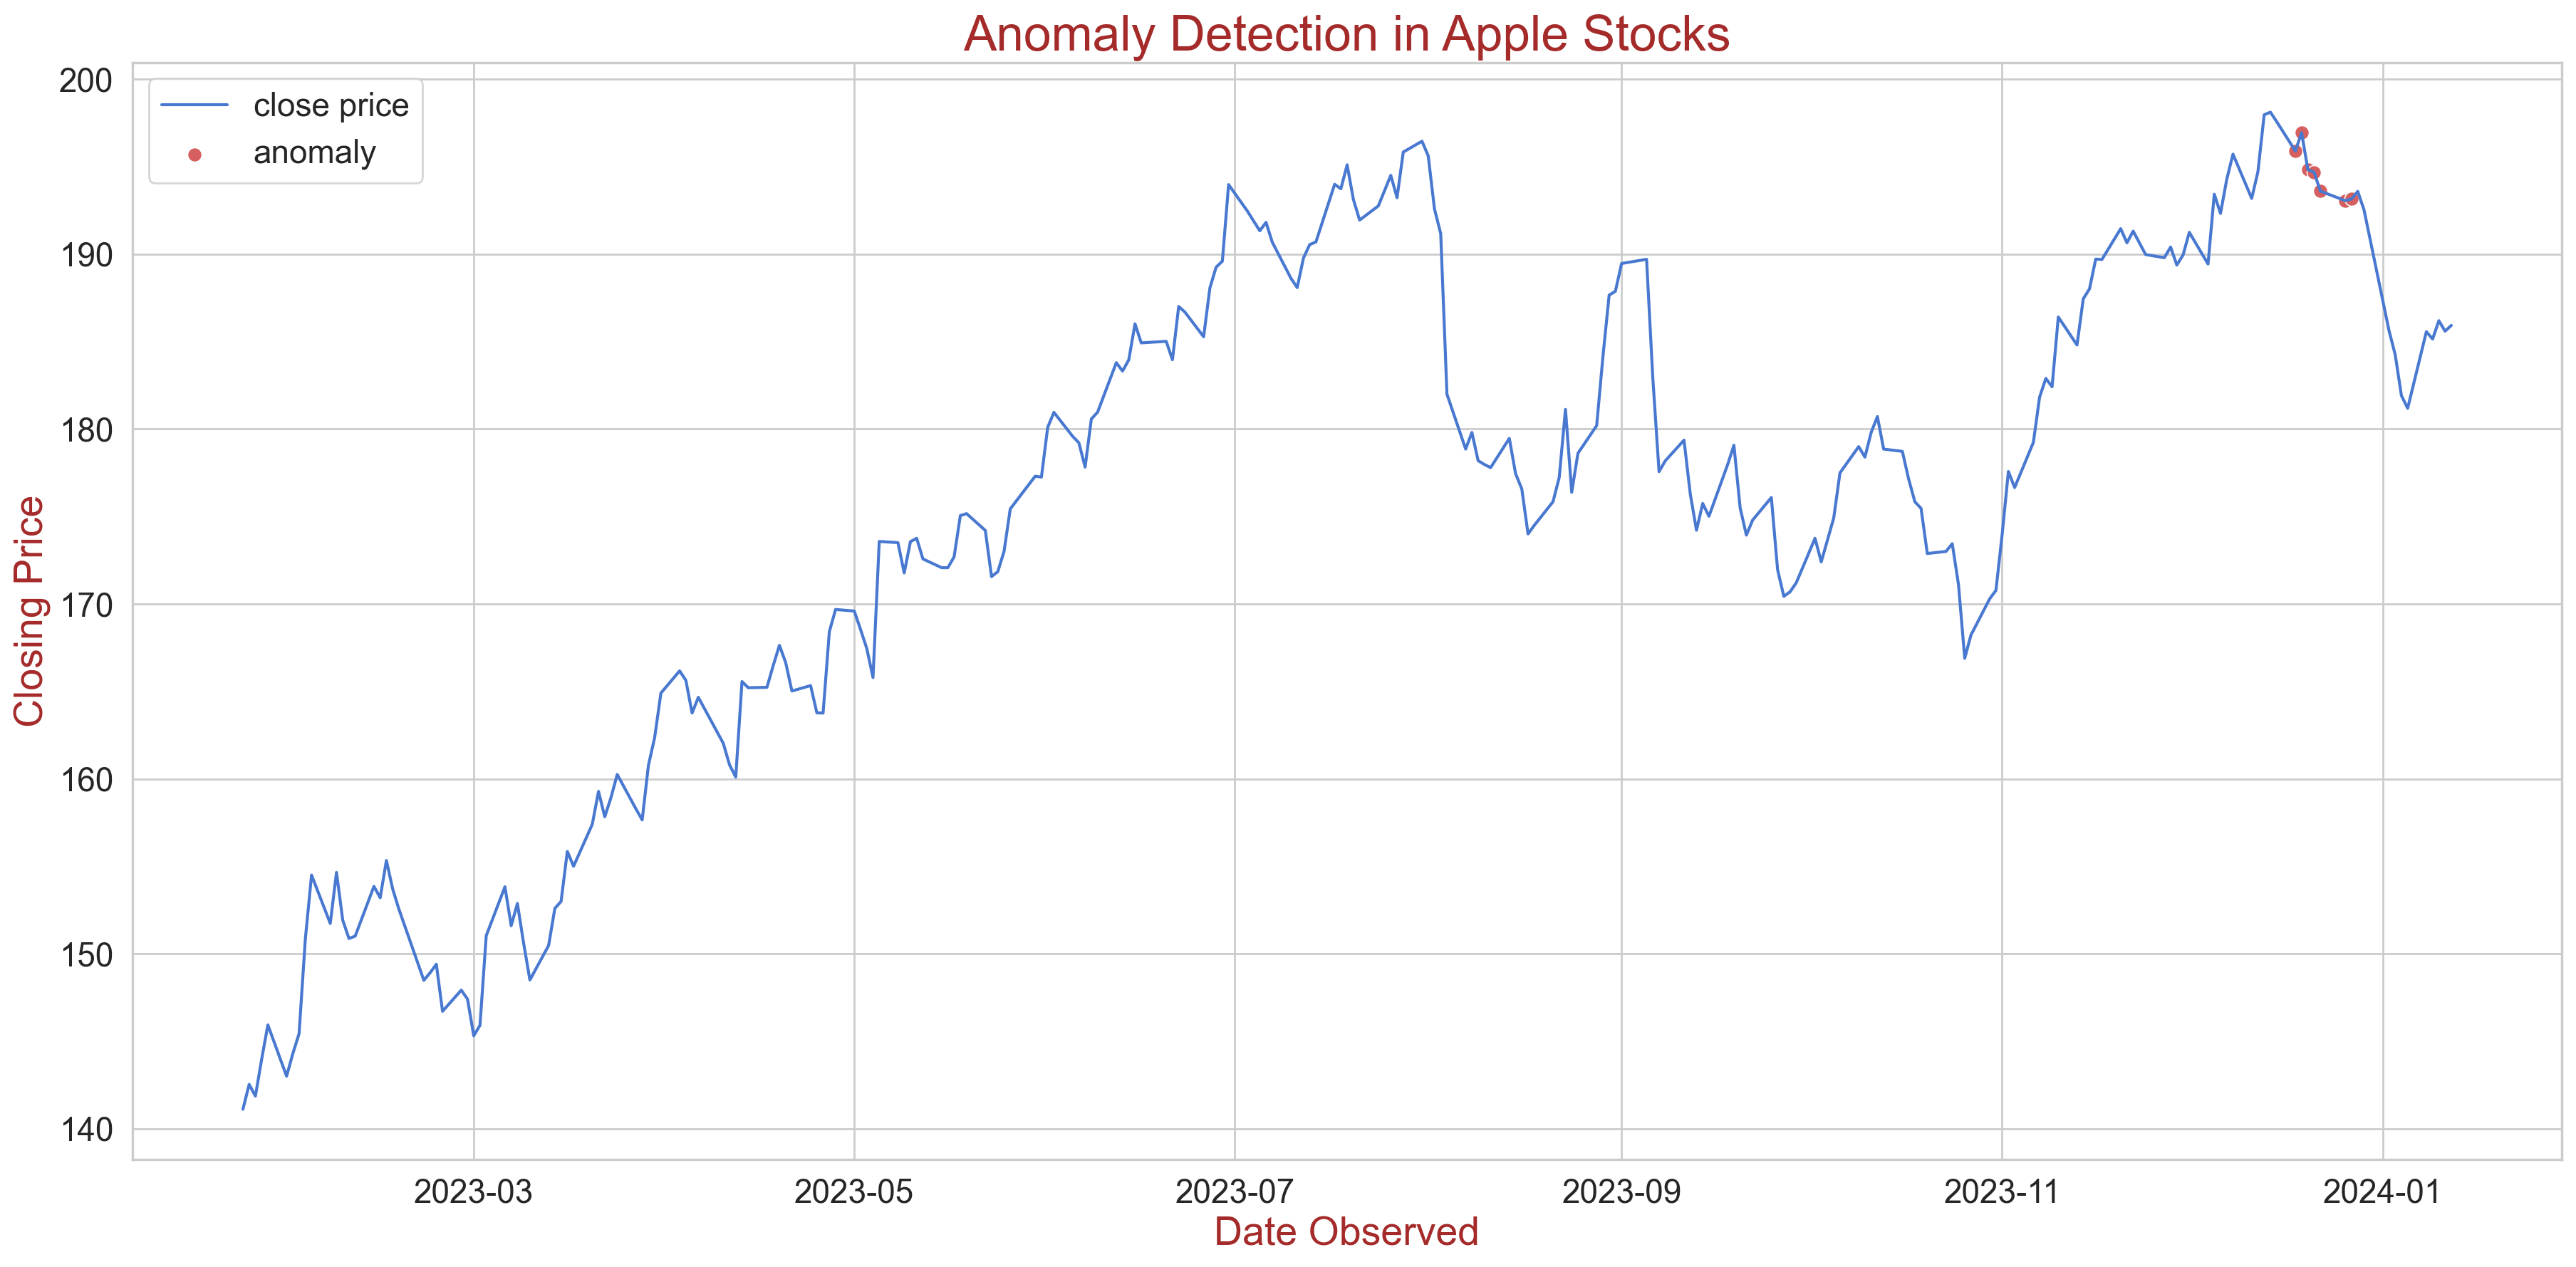

In [75]:
plt.plot(
  test[steps:].index, 
  scaler.inverse_transform(test[steps:].Close.values.reshape(-1,1)), 
  label='close price'
)

sns.scatterplot(
  x=anomalies.index,
  y=scaler.inverse_transform(anomalies.close.values.reshape(-1,1)).flatten(),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.ylabel("Closing Price", color="brown", size=20)
plt.xlabel("Date Observed", color="brown", size=20)
plt.title("Anomaly Detection in Apple Stocks", color="brown", size=25)
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [32]:
main_data.to_csv("AAPL_Stock_Data.csv")